# Exploratory Data Analysis Case Study - 7+ Million Companies Dataset
![](https://cdn.vox-cdn.com/thumbor/JrYpHTzbE9qSu85id9CSkQhs7dM=/0x0:2000x1333/1200x800/filters:focal(840x507:1160x827)/cdn.vox-cdn.com/uploads/chorus_image/image/65018226/151006_19_00_22_5DSR9489.0.jpg)



**What is Exploratory Data Analysis?**

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

**Project Outline**

- select and Download dataset from an online source
- Data preparation and cleaning with Pandas
- Open-ended exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

**Select and download real-world dataset**

On Kaggle, this dataset is accessible. It includes details on the 7 million businesses that exist globally. It contains details about the companies' founding year, employment status, and the nations and places in which they are present. We'll examine this dataset and make some judgments.

Dataset Link - https://www.kaggle.com/peopledatalabssf/free-7-million-company-dataset

**Downloading the Dataset**

There are several options for getting a dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use the `opendatasets` library to download datasets from Kaggle datasets and Google Drive URLs

Let's download the data into the Jupyter notebook. We'll use the opendatasets library Let's install and import it, and use the download method.



# Install and Import all the required libraries.

In [1]:
# Data analysis library in python
import pandas as pd

# numerical computing library
import numpy as np

# for creating static visualizations in Python
import matplotlib
import matplotlib.pyplot as plt

# it turns on “inline plotting”, where plot graphics will appear in your notebook
%matplotlib inline
# a high-level interface for drawing informative statistical graphics.
import seaborn as sns

#for creating interactive visualizations
import plotly.express as px

#Plotting geospatial data with Folium
import folium

# to create wordcloud in python
import wordcloud



# Downloading a dataset from an online

In [2]:
# Install opendatsets library to downlaod the data from kaggle by using link of the data
!pip install opendatasets --upgrade --quiet
import opendatasets as od

#Kaggle Dataset URL
datasets_url = 'https://www.kaggle.com/peopledatalabssf/free-7-million-company-dataset'

# Downloading the dataset
od.download(datasets_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farhan79
Your Kaggle Key: ··········


100%|██████████| 278M/278M [00:12<00:00, 23.6MB/s]


Let's verify that the dataset was downloaded into the directory `free-7-million-company-dataset ` and retrieve the list of files

In [3]:
!ls -1h

free-7-million-company-dataset
sample_data


# Data Preparation and Cleaning with Pandas.

The quality of data is the most crucial element of any business intelligence strategy. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Handle missing, incorrect and invalid datay of the missing values or - drop the values

**load the dataset**

Read the dataset using pandas library and convert the data into dataframe.

In [4]:
%%time
df= pd.read_csv("free-7-million-company-dataset/companies_sorted.csv")


CPU times: user 30.8 s, sys: 7.69 s, total: 38.5 s
Wall time: 41.1 s


In [5]:
df.head()

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


**Some basic information about the data frame.**

`shape`- gives you the information about the shape of rows and column.

`info()`- gives you the information about the shape of rows and column. the datatype,and memory usage.

`describe()` is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

`df.coulums` gives u all the columns present in the dataset

In [6]:
df.shape

(7173426, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   name                       object 
 2   domain                     object 
 3   year founded               float64
 4   industry                   object 
 5   size range                 object 
 6   locality                   object 
 7   country                    object 
 8   linkedin url               object 
 9   current employee estimate  int64  
 10  total employee estimate    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 602.0+ MB


**Observation:**
The Dataset Contains-*italicized text*

*   No of Rows- 7173426
*   No of Columns- 11
*   Datatype of each Columns- object,int64,float
*   The file size 602.0+ MB
*    Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`).





In [8]:
df.describe()

,Unnamed: 0,year founded,current employee estimate,total employee estimate
count,7.173426e+06,3.566446e+06,7.173426e+06,7.173426e+06
mean,3.586712e+06,2.001747e+03,1.387121e+01,3.225438e+01
std,2.070790e+06,2.096627e+01,3.545919e+02,8.741556e+02
min,0.000000e+00,1.451000e+03,0.000000e+00,1.000000e+00
25%,1.793356e+06,1.999000e+03,1.000000e+00,1.000000e+00
50%,3.586712e+06,2.009000e+03,1.000000e+00,2.000000e+00
75%,5.380069e+06,2.013000e+03,4.000000e+00,7.000000e+00
max,7.173425e+06,2.103000e+03,2.740470e+05,7.169060e+05


In [9]:
df.columns

Index(['Unnamed: 0', 'name', 'domain', 'year founded', 'industry',
       'size range', 'locality', 'country', 'linkedin url',
       'current employee estimate', 'total employee estimate'],
      dtype='object')

In [11]:
df['size range'].unique()

array(['10001+', '5001 - 10000', '1001 - 5000', '501 - 1000', '201 - 500',
       '51 - 200', '11 - 50', '1 - 10'], dtype=object)

In [13]:
df['domain'].unique()

array(['ibm.com', 'tcs.com', 'accenture.com', ...,
       'certiportvouchers.com', 'blacktigerclub.com',
       'dynamiccontrolssolutions.com'], dtype=object)

**Drop all the coloumns which does't add value to the data.**

In [14]:
df_new=df.drop(['Unnamed: 0','domain','size range', 'linkedin url'], axis= 1)
df_new.head()

,name,year founded,industry,locality,country,current employee estimate,total employee estimate
0,ibm,1911.0,information technology and services,"new york, new york, united states",united states,274047,716906
1,tata consultancy services,1968.0,information technology and services,"bombay, maharashtra, india",india,190771,341369
2,accenture,1989.0,information technology and services,"dublin, dublin, ireland",ireland,190689,455768
3,us army,1800.0,military,"alexandria, virginia, united states",united states,162163,445958
4,ey,1989.0,accounting,"london, greater london, united kingdom",united kingdom,158363,428960


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 7 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   year founded               float64
 2   industry                   object 
 3   locality                   object 
 4   country                    object 
 5   current employee estimate  int64  
 6   total employee estimate    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 383.1+ MB


**Observations:**

Ater dripping the columns the size of the memory is reduced.
The memory size of the was 602.0+ MB
and now the memory size of the file is -383.1+ MB.

In [20]:
df1=df_new.copy()

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173426 entries, 0 to 7173425
Data columns (total 7 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   name                       object 
 1   year founded               float64
 2   industry                   object 
 3   locality                   object 
 4   country                    object 
 5   current employee estimate  int64  
 6   total employee estimate    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 383.1+ MB


**Make some changes in dataframe to improve the readabilty**

In [22]:
# Renaming the columns
df1 = df1.rename(columns={"year founded": "year_founded","current employee estimate":"current_employee_estimate","total employee estimate":"total_employee_estimate"})


In [24]:
df1.country

0           united states
1                   india
2                 ireland
3           united states
4          united kingdom
                ...      
7173421               NaN
7173422             china
7173423     united states
7173424    united kingdom
7173425     united states
Name: country, Length: 7173426, dtype: object

In [25]:

# Convert strings in the Series/Index to titlecase.
df1.name = df1.name.str.title()
df1.country = df1.country.str.title()
df1.industry = df1.industry.str.title()
df1.locality = df1.locality.str.title()


**Unique values in each column using unique method**

The nuique () method returns the number of unique values for each column.


In [31]:
print("Number of unique values in column: ")
for i in df1:
  count=len(df1[i].unique())
  print(i +" = "+ str(count))

Number of unique values in column: 
name = 7004634
year_founded = 235
industry = 149
locality = 96245
country = 237
current_employee_estimate = 5379
total_employee_estimate = 8486


# Open-ended exploratory analysis and visualization

**Find the missing values**

**Missing(null) values using `isnull().sum()` method**

The `isnull ()`- method returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False.
But when you use sum(), it will return the sum of every column, which adds trues(=1) and false(= 0)

In [33]:
df1.isnull().sum()

name                               3
year_founded                 3606980
industry                      290003
locality                     2508825
country                      2349207
current_employee_estimate          0
total_employee_estimate            0
dtype: int64

**Observation**:
It appears that every column contains some empty values s We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Columns name with missing (null) values

In [34]:
feature_with_na=[feature for feature in df1.columns if df1[feature].isnull().sum()>=1]
feature_with_na

['name', 'year_founded', 'industry', 'locality', 'country']

**Percentage of missing(null) values**

In [35]:
for feature in feature_with_na:
    percentage_=np.round(df1[feature].isnull().mean()*100,4 )
    print("In Column " + feature,' missing values are ',+ percentage_ ,"%")


In Column name  missing values are  0.0 %
In Column year_founded  missing values are  50.2825 %
In Column industry  missing values are  4.0427 %
In Column locality  missing values are  34.9739 %
In Column country  missing values are  32.7487 %


In [36]:
# another way to do this Let's get the percentage of Null values
null_percentages = df1.isna().sum().sort_values(ascending=False)/len(df) * 100
null_percentages

year_founded                 50.282529
locality                     34.973874
country                      32.748745
industry                      4.042741
name                          0.000042
current_employee_estimate     0.000000
total_employee_estimate       0.000000
dtype: float64

In [ ]:
null_values=null_percentages[null_percentages != 0]
null_values
fig = px.bar(null_values,
             title="Null Values Percentage ",
             color_discrete_sequence=["#FF5733"])

fig.update_layout(font_size=18,
                  title_font_size=24,
                  title_font_color="black",
                  plot_bgcolor = "black",
                  showlegend=False)



In [42]:
yr_not_fnd=list(df1['name'].where(df1['year_founded'].isnull()))

In [51]:
cc=[]
for i in yr_not_fnd:
  if type(i) is str:
    cc.append(i)

In [57]:
companies_without_year=cc

In [ ]:
print('list of companies  data without year founded')
companies_without_year

Total we have 3 million companies data without year founded

**Dropping the Missing values**

In [65]:
print("The shape of data before dropping na values :")
df1.shape

The shape of data before dropping na values :


(7173426, 7)

In [66]:
df1=df1.dropna()
print(df1.head(2))

                        name  year_founded  \
0                        Ibm        1911.0   
1  Tata Consultancy Services        1968.0   

                              industry                           locality  \
0  Information Technology And Services  New York, New York, United States   
1  Information Technology And Services         Bombay, Maharashtra, India   

         country  current_employee_estimate  total_employee_estimate  
0  United States                     274047                   716906  
1          India                     190771                   341369  


In [67]:
df1.to_csv('comp_df.csv')

In [68]:
df1.isnull().sum()

name                         0
year_founded                 0
industry                     0
locality                     0
country                      0
current_employee_estimate    0
total_employee_estimate      0
dtype: int64

**checking duplicated rows**

In [78]:
df1.duplicated().sum()

168

In [80]:
df1=df1.drop_duplicates()

In [81]:
df1.duplicated().sum()

0

## Asking and answering interesting questions.

1 What is the corelation between the columns?

2-Name of the 15 companies has the maximumn current employees?

3-Find the companies establised before year 1800 and their country of origin?

4-Distribution of companies founded after 1800 year?

5- which industry has the most spread around the world?

6- what are the top 5 industries around the world?

7-How are the various industries distributed in the countrie in 21st century?

8-Create a TreeMap for countries in the data set?

9-which are the the Top 10 countries with the maximum companies?

10-Countries and their distributions in industries evolved over years?

11-Which country has more number of Medical industries with more employee?

12-what is the growth of the employees over the years?

13-Which city has more number of Medical industries with more number of employees within the country?

14-which company has most spread around the world?

### Q1: Is there any correlation between the columns?

In [69]:
df1.corr()

<ipython-input-69-49b3fcfeb4d1>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,year_founded,current_employee_estimate,total_employee_estimate
year_founded,1.000000,-0.075891,-0.076163
current_employee_estimate,-0.075891,1.000000,0.976218
total_employee_estimate,-0.076163,0.976218,1.000000


<ipython-input-70-c98bee75b165>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

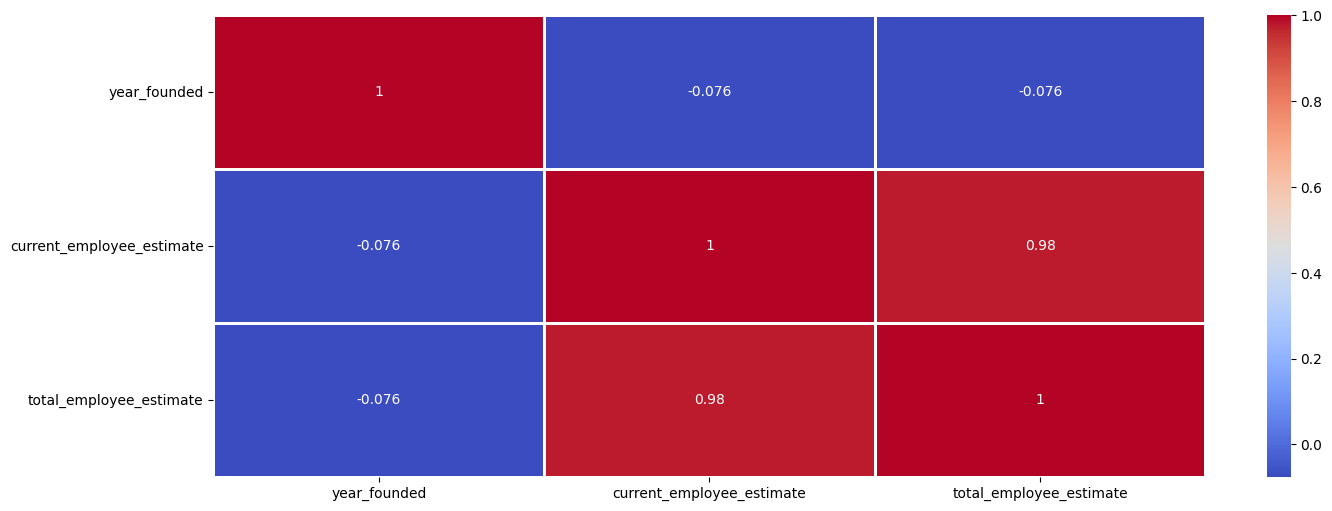

In [70]:
plt.figure(figsize=(16,6))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", linewidths=2)

**Observations:**
- From the above graph we can see that only 3 columns have correlation with each other and current employee and total employess have a strong correlation.

### Q2: Name of the 15 companies has the maximumn current employees?



In [113]:
df_name_cemp=df1[['name','current_employee_estimate']].sort_values(by='current_employee_estimate', ascending=False)[:15]

In [114]:
df_name_cemp

,name,current_employee_estimate
0,Ibm,274047
1,Tata Consultancy Services,190771
2,Accenture,190689
3,Us Army,162163
4,Ey,158363
5,Hewlett-Packard,127952
6,Cognizant Technology Solutions,122031
7,Walmart,120753
8,Microsoft,116196
9,At&T,115188


In [123]:
fig = px.histogram(df_name_cemp, y='current_employee_estimate', x='name',
                          hover_name='current_employee_estimate')


fig.update_layout(template='plotly_dark',
                 title="Top 15 countries with maximum current employee",
                 xaxis_title="Companies ",
                 yaxis_title="Current Employee",
                 showlegend=False)

fig.show()

Observations:
* IBM comes at the first position in total current employee and have more than 25000 employees as per the graph representation, and as per given data the exact number current employees are 274047
* Tcs and Accentures comes at the second and 3rd and as per the given data the exact number of current employees are 190771	,190689 respectively.



**Analysis on Column ["year found"]**

Firstly change the datatype of column 'year founded'

In [124]:
df1['year_founded']= df1['year_founded'].astype(int)

In [125]:
df1['year_founded'].dtypes

dtype('int64')

In [126]:
df1['year_founded'].max()

2103

The maximum value in the column 'year founded' is 2103 which is not possible, lets drop all the records from the data in the dataframe which is more than 2022 in column 'year founded'.

In [127]:
df1.index[df1['year_founded'] > 2022] # there are 5 records in the data which is greater that year 2022

Int64Index([478790, 1685181, 1911596, 2802880, 2939095], dtype='int64')

In [128]:
df1.drop(df1.index[df1["year_founded"]>2022],inplace =True)

Check wheather we have sucessfully removed all the record from the dataframe or not.


In [129]:
df1[df1['year_founded'] > 2022]

,name,year_founded,industry,locality,country,current_employee_estimate,total_employee_estimate


In [130]:
df1.shape

(2684147, 7)

Observations:
* Previoulsy the total number of rows  were 2684320,
* After removing the data the total number of Rows are 2684315.

Let's look at the number of companies that were established before the 20th century.

In [131]:
df1[df1['year_founded']  < 1900]

,name,year_founded,industry,locality,country,current_employee_estimate,total_employee_estimate
3,Us Army,1800,Military,"Alexandria, Virginia, United States",United States,162163,445958
9,At&T,1876,Telecommunications,"Dallas, Texas, United States",United States,115188,269659
15,Citi,1812,Financial Services,"New York, New York, United States",United States,101482,298171
17,Jpmorgan Chase & Co.,1823,Financial Services,"New York, New York, United States",United States,95234,242135
21,Siemens,1847,Electrical/Electronic Manufacturing,"Munich, Bavaria, Germany",Germany,87381,240528
...,...,...,...,...,...,...,...
7165824,Quien&Cie,1877,Wine And Spirits,"Bordeaux, Nouvelle-Aquitaine, France",France,0,1
7166941,Griffin Stringer Ltd,1836,Environmental Services,"Leicester, City Of Leicester, United Kingdom",United Kingdom,0,1
7168246,Institut Archéologique Du Luxembourg Asbl,1847,Government Administration,"Arlon, Luxembourg, Belgium",Belgium,0,1
7170784,Advokatfirmaet Lars Meilvang,1899,Legal Services,"Auning, Midtjylland, Denmark",Denmark,0,1


There are 26005 companies are established before 20th century.

### Q3: Find the companies establised before year 1800 and their country of origin?

In [158]:
df1[df1['year_founded']<1800]  #easy approach

,name,year_founded,industry,locality,country,current_employee_estimate,total_employee_estimate
1678,U.S. Department Of The Treasury,1789,Government Administration,"Washington, District Of Columbia, United States",United States,4886,10291
2191,University Of Glasgow,1451,Research,"Glasgow, Glasgow City, United Kingdom",United Kingdom,4005,10503
191151,Technology Services Organization (Tso),1775,Computer Software,"Washington, District Of Columbia, United States",United States,55,77
351208,The Times Herald,1799,Newspapers,"Norristown, Pennsylvania, United States",United States,27,169
1192238,Us Naval Reserve Officer,1775,Defense & Space,"Lincoln, Nebraska, United States",United States,6,25
2046002,Marine Corps Officer Selection,1775,Mechanical Or Industrial Engineering,"Tallahassee, Florida, United States",United States,3,3
2939091,White House Athletic Center,1789,"Health, Wellness And Fitness","Washington, District Of Columbia, United States",United States,2,7
6112171,Old Farmer'S Almanac,1792,Publishing,"Dublin, New Hampshire, United States",United States,0,2


In [138]:
data2= df1.copy()

data2.query("0 < `year_founded` < 1800")[['year_founded','name',"country","industry"]].reset_index(drop=True)

,year_founded,name,country,industry
0,1789,U.S. Department Of The Treasury,United States,Government Administration
1,1451,University Of Glasgow,United Kingdom,Research
2,1775,Technology Services Organization (Tso),United States,Computer Software
3,1799,The Times Herald,United States,Newspapers
4,1775,Us Naval Reserve Officer,United States,Defense & Space
5,1775,Marine Corps Officer Selection,United States,Mechanical Or Industrial Engineering
6,1789,White House Athletic Center,United States,"Health, Wellness And Fitness"
7,1792,Old Farmer'S Almanac,United States,Publishing


**Observations**:
- There are only 8 companies estabished befor 1800 years in united states.

### Q4-Distribution of companies founded after 1800 year?



The dataset is very large in size lets take only 20000 rows to do the analysis.

since we have very large dataset lets, lets drop all the null values.

The dataset is large in size lets take only 20000 row to get the insight of data.

In [139]:
sample_df1 = pd.read_csv('comp_df.csv',index_col = 0, nrows=25000)
sample_df1.head()

,name,year_founded,industry,locality,country,current_employee_estimate,total_employee_estimate
0,Ibm,1911.0,Information Technology And Services,"New York, New York, United States",United States,274047,716906
1,Tata Consultancy Services,1968.0,Information Technology And Services,"Bombay, Maharashtra, India",India,190771,341369
2,Accenture,1989.0,Information Technology And Services,"Dublin, Dublin, Ireland",Ireland,190689,455768
3,Us Army,1800.0,Military,"Alexandria, Virginia, United States",United States,162163,445958
4,Ey,1989.0,Accounting,"London, Greater London, United Kingdom",United Kingdom,158363,428960


In [140]:
sample_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 40217
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       25000 non-null  object 
 1   year_founded               25000 non-null  float64
 2   industry                   25000 non-null  object 
 3   locality                   25000 non-null  object 
 4   country                    25000 non-null  object 
 5   current_employee_estimate  25000 non-null  int64  
 6   total_employee_estimate    25000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB


In [141]:
#change the datatype of "year founded"
sample_df1 ["year_founded"]=sample_df1 ["year_founded"].astype(int)

In [142]:
df1_=sample_df1 [sample_df1 ['year_founded']>1800]
fig = px.histogram(df1_ ,
                   x='year_founded',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of companies after 1800 Year.')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
print("The mean of year founded is " ,df1_["year_founded"].mean())
print("The median of year founded  is ", df1_["year_founded"].median())

The mean of year founded is  1961.619794375325
The median of year founded  is  1977.0


Observations:
* Here our mean is somewhere around 1961 and median is 1977.
* Most of the companies are established between 1946-2007.

* Our chart is showing left-skewed distribution.(A "skewed left" distribution is one in which the tail is on the left side.)

* If the histogram is skewed left, the mean is less than the median.This is the case because skewed-left data have a few small values that drive the mean downward but do not affect where the exact middle of the data is (that is, the median).






**Analysis on column ["Industry"**]

### Q5: which industry has the most spread around the world?

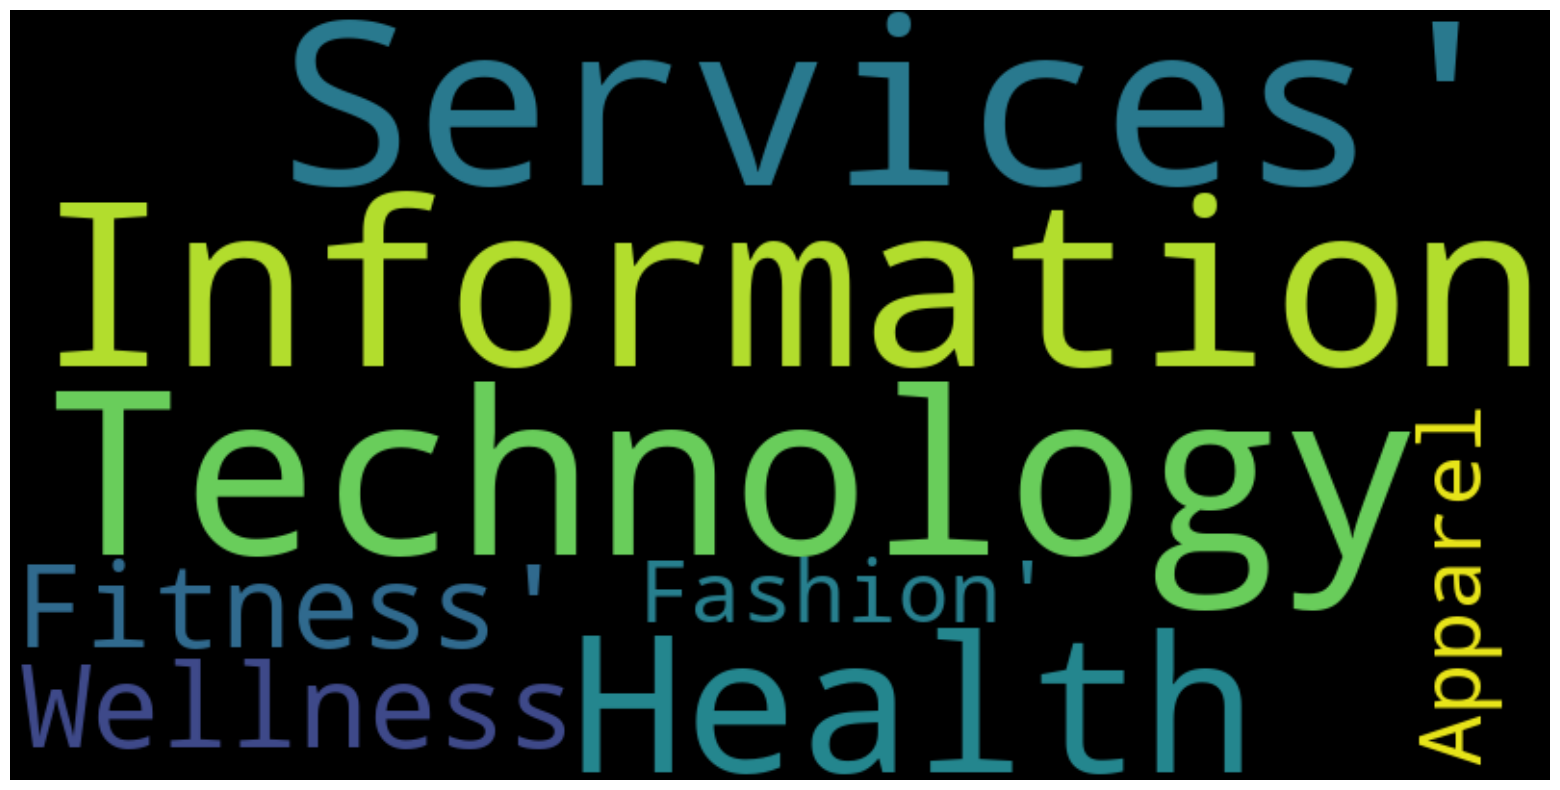

In [146]:
data4=df1.copy()
from PIL import Image
from wordcloud import WordCloud
text = data4['industry'].values
wordcloud = WordCloud(width=800, height=400, background_color='black',).generate(str(text))
# Display the generated image:
# the matplotlib way:


plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

**observations:**

From the above word cloud, we can analyze that Information Technology And Services, heath and wellness, are indusrtries has most spread around the world.

### Q6: what are the top 5 industries around the world?

In [144]:
len(df["industry"].unique())

149

observation: As per the data set there are total only 149 industry

In [151]:
data5 = df1.copy() # this dataframe all the values agter dropping the null values from the real datadet
industry_df = data5['industry'].value_counts().rename_axis('industry').reset_index(name='count')
industry_df

,industry,count
0,Information Technology And Services,215291
1,Marketing And Advertising,165358
2,Management Consulting,89505
3,Computer Software,86842
4,Construction,86287
...,...,...
143,Ranching,543
144,Railroad Manufacture,496
145,Tobacco,427
146,Nonprofit Organization Management,162


In [152]:
industy_df1=industry_df.nlargest(5, 'count').sort_values('count', ascending = True)
industy_df1

,industry,count
4,Construction,86287
3,Computer Software,86842
2,Management Consulting,89505
1,Marketing And Advertising,165358
0,Information Technology And Services,215291


In [153]:
fig=px.bar(industry_df, y= industy_df1["industry"], x= industy_df1["count"],color=industy_df1["industry"],
                title="Top 5 Industries in the Whole World ")
fig.update_layout(yaxis_title='Industries',
                  xaxis_title='Counts',
                  title_font_size=24,
                  title_font_color="Black",
                  font_size=14,
                  showlegend=False
)
fig.update_xaxes(color='Black')
fig.update_yaxes(color='Black')
fig.update_layout(plot_bgcolor="Black")
fig.update_layout(paper_bgcolor="#9ACD32")
fig.show()


**Observations:**

Top 5 industries in the whole world are.
               
1. Information Technology and Services
2. Marketing and Advertising
3. Management Consulting
4. Computer Software
5. Construction












### Q7: How are the various industries distributed in the countries in 21st century?

In [159]:
data_6 = sample_df1.copy()
data_6 = data_6[data_6["year_founded"] > 2000]
fig = px.scatter(data_6[:1000],
                 x='industry',
                 y='year_founded',
                 color='country',
                 hover_data=['total_employee_estimate'],
                 title='Industries evloved over the years',
                 width=1200, height=600)
fig.update_traces(marker_size=5)
fig.update_traces(marker=dict(size=15,opacity = 0.7,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(template="plotly",title='Distribution of industries in 21st century',
                 yaxis_title='Year from 1800 to 2016',
                 xaxis_title="Industry")

fig.show()


Observations:
- After 20th century the industries are rapidaly increasing.

Observations:
- Individually we can check the distribution of the indusries  in specific country by clicking on the country name in the legand(country name fiven at the right side of the  above graph.)
- In United Kingdom and United States maximum indusrtries Accounting industries are evolved during years.


**Analysis on column ["locality"]**

### Q8: Create a TreeMap for countries with maximum current employee in the data set?

Split the column locality

In [171]:
data9=sample_df1.copy()
data9[['city','state','country']] = data9.locality.apply(lambda x: pd.Series(str(x).split(", ")))

In [172]:
data9[['city','state','country']]

,city,state,country
0,New York,New York,United States
1,Bombay,Maharashtra,India
2,Dublin,Dublin,Ireland
3,Alexandria,Virginia,United States
4,London,Greater London,United Kingdom
...,...,...,...
40213,Salt Lake City,Utah,United States
40214,Columbia,Illinois,United States
40215,Giethoorn,Overijssel,Netherlands
40216,Philadelphia,Pennsylvania,United States


Convert strings in the Series/Index to titlecase.

In [173]:
data9.country = data9.country.str.title()
data9.city = data9.city.str.title()
data9.state = data9.state.str.title()

In [176]:
data9.isnull().sum()

name                         0
year_founded                 0
industry                     0
locality                     0
country                      0
current_employee_estimate    0
total_employee_estimate      0
city                         0
state                        0
dtype: int64

In [163]:
fig = px.treemap(data9,
               path=["country","state","city"],
               values= "current_employee_estimate",
               color_continuous_scale="RdBu",
               title="Treemap of the countries with maximum employee")
fig.show()

**Observations:**

- United states has maximum number around 60% of current employees.

**Analysis on Column ["Country"]**

### Q9: Which are the Top 10 countries with the maximum companies?

In [179]:
data6=df1.copy()
country_df = data6['country']
country_df

0           United States
1                   India
2                 Ireland
3           United States
4          United Kingdom
                ...      
7173404            Poland
7173411     United States
7173416          Slovakia
7173417             Italy
7173422             China
Name: country, Length: 2684147, dtype: object

In [180]:
data6=df1.copy()
country_df = data6['country'].value_counts().rename_axis('country').reset_index(name='count')
country_df


,country,count
0,United States,1088237
1,United Kingdom,222690
2,Canada,121762
3,Netherlands,108681
4,India,96107
...,...,...
227,Palau,1
228,Saint Helena,1
229,U.S. Virgin Islands,1
230,Samoa,1


In [185]:
country_df.sort_values(by='count',ascending=False)[:10]

,country,count
0,United States,1088237
1,United Kingdom,222690
2,Canada,121762
3,Netherlands,108681
4,India,96107
5,Spain,89539
6,France,84157
7,Brazil,81602
8,Italy,76647
9,Australia,65577


In [181]:
country_df1=country_df.nlargest(10, 'count').sort_values('count', ascending = True)
country_df1

,country,count
9,Australia,65577
8,Italy,76647
7,Brazil,81602
6,France,84157
5,Spain,89539
4,India,96107
3,Netherlands,108681
2,Canada,121762
1,United Kingdom,222690
0,United States,1088237


In [182]:
fig=px.bar(country_df[:1000],
           y= country_df1["country"],
           x= country_df1["count"],
           color=country_df1["country"],
                title="Top 10 countries with maximum companies")
fig.update_layout(yaxis_title='companies',
                  xaxis_title='Counts',
                  title_font_size=24,
                  title_font_color="Blue",
                  font_size=14,
)
fig.update_xaxes(color='Black')
fig.update_yaxes(color='Black')
fig.update_layout(plot_bgcolor="Black")
fig.update_layout(paper_bgcolor="YellowGreen")
fig.show()

**Observations:**
- United states has maximum number of employess followed by United Kingdom  India, Canada, Brazil, France, Netherland, Australia, Italy, Spain, Germany.
Observations:

### Q10: Countries and their distributions in industries evolved over years?

In [190]:
data_7=df1.copy()

fig = px.scatter(data_7[:1000],
                 x='country',
                 y="year_founded",
                 color='industry',
                hover_data=['year_founded'],
                 title='industry',
                 width=1200, height=600)
fig.update_traces(marker_size=5)
fig.update_traces(marker=dict(size=15,opacity = 0.7,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(template="plotly",title='Accounting industry and their distribution in the countries evolved over years.',
                 yaxis_title='Year',
                 xaxis_title="country")
fig.show()

Observation:
* Individually we can check the distribution of the indusries by clicking on the industry name in the legand(insdustry written on the right side of the graph)
* We choose the accounting industry in legand and took the screenshot of that.
* In United Kingdom and United States maximum indusrtries Accounting industries are evolved over years.


### Q11: Which country has more number of Medical industries with more employees?

In [191]:
Medical_industry=[
'Hospital & Health Care',
'Public Policy',
'Alternative Medicine',
'Mental Health Care',
'Philanthropy',
'Veterinary',
'Medical Practice',
'Insurance''Cosmetics',
'Health, Wellness And Fitness',
'Hospitality',
'Human Resources',
'Medical Devices',
'Biotechnology',
'Cosmetics']


In [ ]:
Medical_df= data9[data9.industry.isin(Medical_industry)]
Medical_df

In [213]:

Medical_df = Medical_df[:100]

fig = px.histogram(Medical_df, x='country', y='total_employee_estimate', color='country')

fig.update_layout(template='plotly_dark',
                 title="Medical Industry in different cities",
                 yaxis_title="Total out of 100",
                 xaxis_title="Cities around the world",
                 legend_title ='Name of Country')
fig.show()

**Observations:**
- The united state has maximum no of medical industries more than 2 millions, followed by united kindom has the around 0.3 million and other than this almost all the other countries has less than 0.2 of medical industries.

### Q12: what is the growth of the employees over the years?

In [207]:

data_8=df1[df1['year_founded']>1700][:2000]
fig = px.histogram(data_8,
                 x="year_founded",
                 y="total_employee_estimate",
                 color= "year_founded",
                 color_discrete_sequence=['purple'],
                 hover_data=['total_employee_estimate'],
                 title='Growth of the employees over the years')
fig.update_layout(bargap=0.1,
                showlegend=False,
                yaxis_title="Current Employee count",
                xaxis_title="year")
fig.show()

**Observations:**
- From the above graph, we can see that in year 1800 there were less than 0.2 million employess, in today in 21st century the current employese are more than 3 million.

### Q13: Which city has more number of Medical industries with more number of employees within the country?

In [209]:
Medical_df

,name,year_founded,industry,locality,country,current_employee_estimate,total_employee_estimate,city,state
35,Kaiser Permanente,1945,Hospital & Health Care,"Oakland, California, United States",United States,65839,105240,Oakland,California
49,Unitedhealth Group,1980,Hospital & Health Care,"Minneapolis, Minnesota, United States",United States,57720,103293,Minneapolis,Minnesota
66,Johnson & Johnson,1887,Hospital & Health Care,"New Brunswick, New Jersey, United States",United States,43985,118073,New Brunswick,New Jersey
75,Philips,1891,Hospital & Health Care,"Guildford, Surrey, United Kingdom",United Kingdom,41732,115665,Guildford,Surrey
101,Adp,1949,Human Resources,"Roseland, New Jersey, United States",United States,35686,81555,Roseland,New Jersey
...,...,...,...,...,...,...,...,...,...
1380,Centene Corporation,1984,Hospital & Health Care,"Saint Louis, Missouri, United States",United States,5633,8677,Saint Louis,Missouri
1387,Erasmus Mc,2002,Hospital & Health Care,"Giethoorn, Overijssel, Netherlands",Netherlands,5609,13898,Giethoorn,Overijssel
1396,Bayada Home Health Care,1975,Hospital & Health Care,"Taylor, Florida, United States",United States,5579,8892,Taylor,Florida
1422,Amc,1983,Hospital & Health Care,"Amsterdam, Noord-Holland, Netherlands",Netherlands,5518,13259,Amsterdam,Noord-Holland


In [211]:



fig = px.histogram(Medical_df, x='city', y='total_employee_estimate',

                          color='country',
                          hover_name='city')

fig.update_layout(template='plotly_dark',
                 title="Medical Industry in different countries",
                 yaxis_title="Total out of 200",
                 xaxis_title="Countries",
                 legend_title ='Name of Country')
fig.show()

Observations:

* In United state- Minneapolis and New york has maximum number of Medical indusries.
* In United kingdom - Guildford has maximum number of Medical indusries.
* In Switzerland- Basil has maximum number of Medical indusries.
* In Netherland- Noord has maximum number of Medical indusries.
* In Freance- Pris has maximum number of Medical indusries.
* In India - chennai has maximum number of Medical indusries.

### Q14: Which company has most spread around the world?

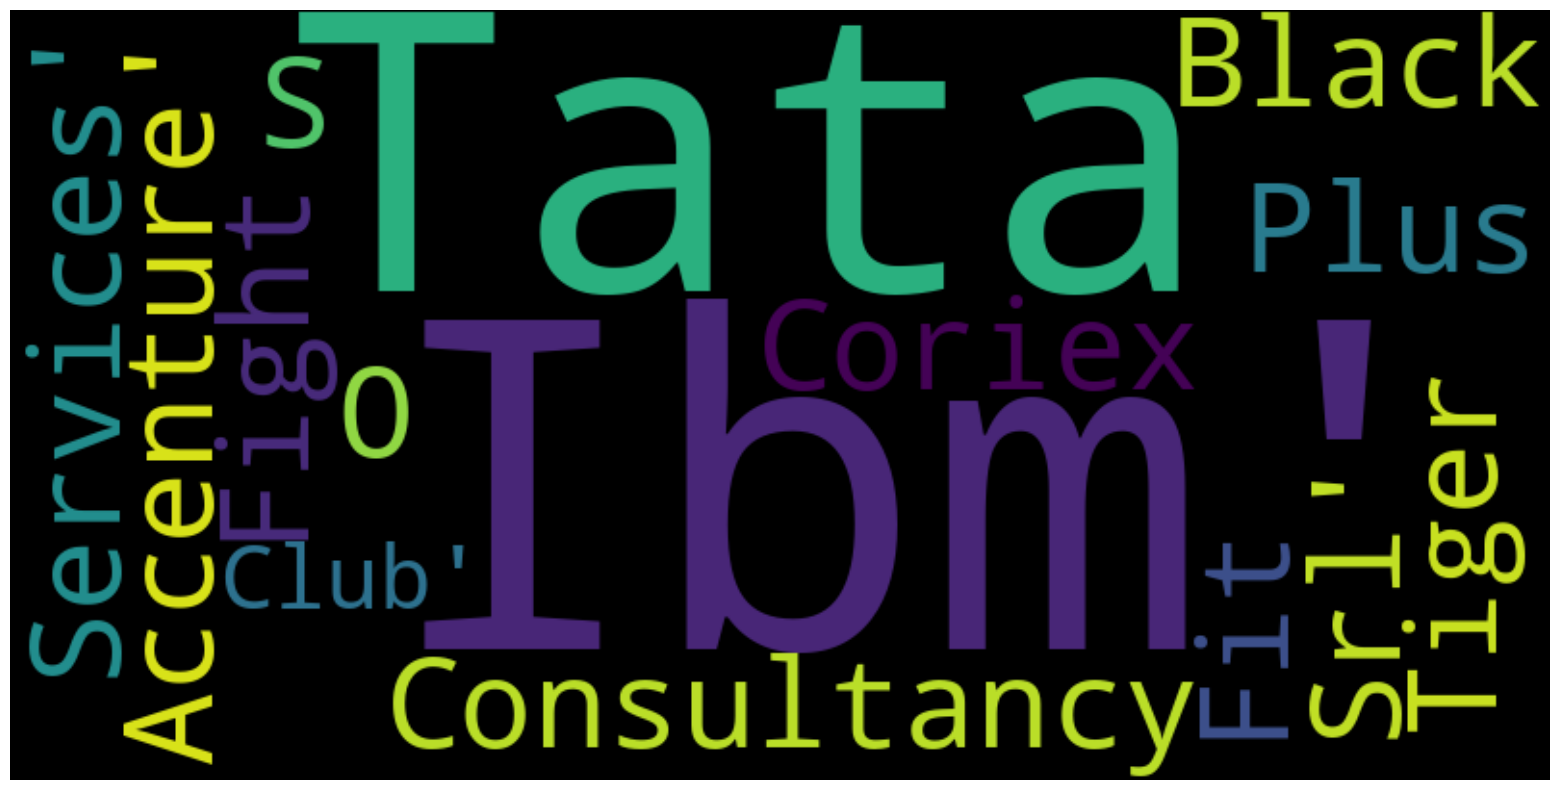

In [214]:
data10=df1.copy()
from PIL import Image
from wordcloud import WordCloud
text = data10["name"].values
wordcloud = WordCloud(width=800, height=400, background_color='black',).generate(str(text))
# Display the generated image:
# the matplotlib way:


plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

**Observations:**
- The company Ibm has most spread around the world.

# **Summary**
- Only 8 companies are established before 1800 in United states.
- Most countries are established around 1967 to 1997 around the world.
- Most of the companies are established in the United States followed by UK and India.
- From the chart, we can see that in year 1800 there were less than 0.2 million employess, in today in 21st century the current employese are more than 3 million.
-The united state has maximum no of medical industries more than 2 millions, followed by united kindom has the around 0.3 million and other than this almost all the other countries has less than 0.2 of medical industries.
-In United state Minneapolis and New york has maximum number of Medical indusries.
-In United kingdom Guildford has maximum number of Medical indusries.
- IBM, tata, Accenture are the companies with maximum current employees,IBM comes at the first position in total current employee and have more than 25000 employees as per the graph representation, and as per given data the exact number current employees are 274047
Tcs and Accentures comes at the second and 3rd and as per the given data the exact number of current employees are 190771 ,190689 respectively.
- From the chart, we can see that the higher education sector is among the top top 5 industries followed by hospital and health care, IT, financial services, amd retails
- Insurance is contributing around 3 % all over the world.


# Reference


Check out the following resources to learn more about the dataset and tools used in this notebook:

- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- plotly user guide and tutorial https://plotly.com/python/
- `opendatasets` Python library: https://github.com/JovianML/opendatasets